File to train the UNet on the virtual machine on the whole dataset

In [4]:
import torch
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from utils.dataset import CocoDataset
from utils.plots import plot_l, plot_model_pred, plot_losses
from utils.models import UNet, save_model, load_model
from utils.metrics import evaluate_model
from utils.training import train_cnn, load_losses

device = "cuda" if torch.cuda.is_available() else "cpu"
height, width = 256, 256
path_vm = "/home/default/coco/train/"
transform = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.ToTensor(),
])
dataset = CocoDataset(root=path_vm, transform=transform)
NUM_EPOCHS = 20

Found 82783 images.


In [2]:
torch.manual_seed(42)
test_size = int(0.2 * len(dataset))
train_size = len(dataset) - test_size
train, test = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train, batch_size=64, shuffle=True)
test_loader = DataLoader(test, batch_size=64, shuffle=False)

# L1 Smooth

In [3]:
torch.manual_seed(42)
model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion3 = nn.SmoothL1Loss()

In [4]:
torch.manual_seed(42)
train_losses_l1smooth, test_losses_l1smooth = train_cnn(NUM_EPOCHS, model, criterion3, optimizer, train_loader, test_loader, device,
                                                        save_losses=True, save_checkpoints=True, file_name="unet_l1smooth")
# machine disconnected so outputs are not saved, but files are.

Testing: 100%|██████████| 259/259 [05:55<00:00,  1.37s/it]


Epoch 1, Train Loss: 0.0021416322447377558, Validation Loss: 0.0015163392023611311


Testing: 100%|██████████| 259/259 [05:57<00:00,  1.38s/it]


Epoch 2, Train Loss: 0.001500509013613047, Validation Loss: 0.0014681374913973295


Testing: 100%|██████████| 259/259 [05:48<00:00,  1.34s/it]


Epoch 3, Train Loss: 0.0014624735089648821, Validation Loss: 0.0014502496569162113


Testing: 100%|██████████| 259/259 [05:51<00:00,  1.36s/it]


Epoch 4, Train Loss: 0.0014332833572781244, Validation Loss: 0.0014249084793340459


Testing: 100%|██████████| 259/259 [05:51<00:00,  1.36s/it]


Epoch 5, Train Loss: 0.0014038578019441434, Validation Loss: 0.0014107310281469554


Testing: 100%|██████████| 259/259 [05:52<00:00,  1.36s/it]


Epoch 6, Train Loss: 0.0013777357410270595, Validation Loss: 0.0013752617697055276
Model saved to models/unet_l1smooth_6.pth successfully!


Testing: 100%|██████████| 259/259 [05:56<00:00,  1.38s/it]


Epoch 7, Train Loss: 0.0013584963549918311, Validation Loss: 0.0013808401334764703


Epoch 8/20:  36%|███▋      | 376/1035 [09:11<14:59,  1.37s/it]Bad pipe message: %s [b'\x96\xfej[\xe9\xf8pH\xb1|\xb6dv\xb2|\xe2\xfc\xe5 \x08M\x1c\x06\xb9C\xe2o\xe6\xf17\x8e\x92\x9d']
Bad pipe message: %s [b'\xb4\x0e\x82\xb88\xbcK\x95\x91\xae:\xb8\xbe\xed\x06\xb9\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08', b'\x0b\x08\x04\x08\x05\x08\x06\x04\x01']
Bad pipe message: %s [b'\xd4s\x10o\x8b\x12J,\xf9\x7fus\x81\xd6\x1f\x1b\xda\xa6 \xe1\xfeT\x9c3\xf4\xacW?\xe3 C\x99Y\xa2\r\xea\x02b B\x05$\x00\xd9\xa2\xb4\xaa\xee\x92\xa1>\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.', b'1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x0

Epoch 8, Train Loss: 0.0013395350336452613, Validation Loss: 0.0013571645400188431


Testing: 100%|██████████| 259/259 [05:26<00:00,  1.26s/it]


Epoch 9, Train Loss: 0.0013243054824314364, Validation Loss: 0.0013333443567088471


Testing: 100%|██████████| 259/259 [05:26<00:00,  1.26s/it]


Epoch 10, Train Loss: 0.001309699728153646, Validation Loss: 0.00139328113597059


Testing: 100%|██████████| 259/259 [05:23<00:00,  1.25s/it]


Epoch 11, Train Loss: 0.001299389639975062, Validation Loss: 0.001318737047564411


Epoch 12/20:  45%|████▌     | 466/1035 [10:03<12:28,  1.32s/it]

In [ ]:
save_model(model, "unet_l1smooth_trained")

In [7]:
model = load_model(UNet(), "/home/default/image-colorization/models/unet_l1smooth_trained.pth").to(device)
train_losses_l1smooth, test_losses_l1smooth = load_losses("/home/default/image-colorization/losses/unet_l1smooth.txt")

UNet model loaded successfully!


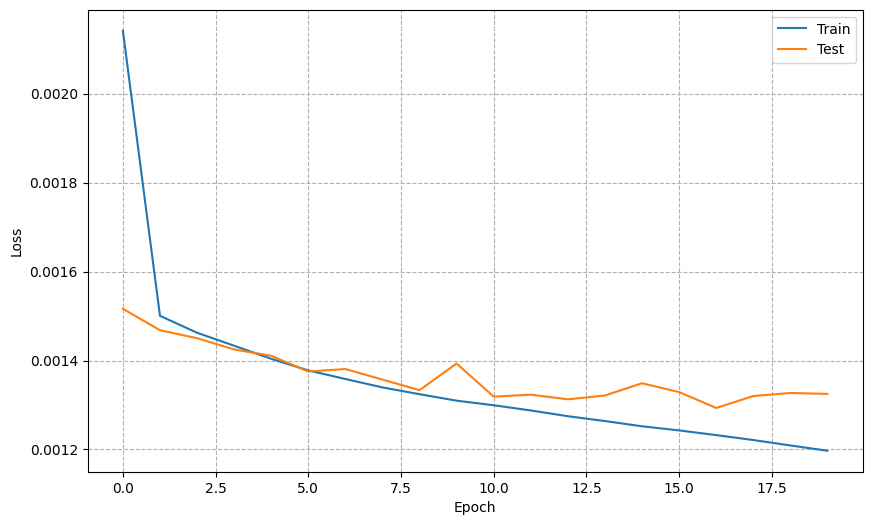

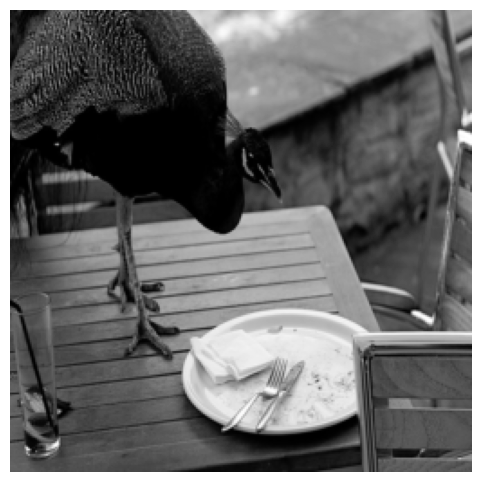

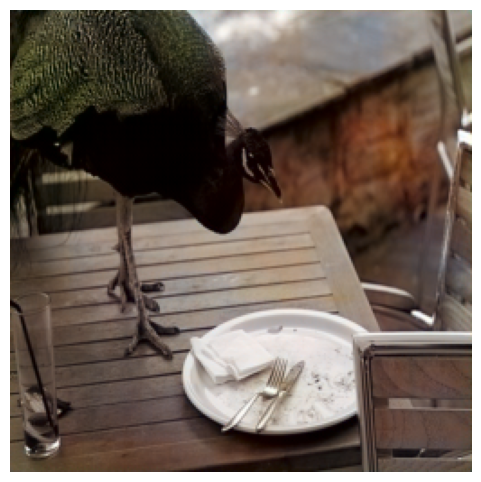

In [8]:
plot_losses(train_losses_l1smooth, test_losses_l1smooth)
plot_l(dataset[7653][1])
plot_model_pred(dataset[7653][1], model, device)

In [ ]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")

# L1 Loss

In [ ]:
torch.manual_seed(42)
model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion2 = nn.L1Loss()

In [ ]:
torch.manual_seed(42)
train_losses_l1, test_losses_l1 = train_cnn(NUM_EPOCHS, model, criterion2, optimizer, train_loader, test_loader, device,
                                            save_losses=True, save_checkpoints=True, file_name="unet_l1")

In [ ]:
save_model(model, "unet_l1_trained")

In [ ]:
plot_losses(train_losses_l1, test_losses_l1)
plot_l(dataset[7653][1])
plot_model_pred(dataset[7653][1], model, device)

In [ ]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")

# MSE Loss

In [ ]:
torch.manual_seed(42)
model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion1 = nn.MSELoss()

In [ ]:
torch.manual_seed(42)
train_losses_mse, test_losses_mse = train_cnn(NUM_EPOCHS, model, criterion1, optimizer, train_loader, test_loader, device,
                                              save_losses=True, save_checkpoints=True, file_name="unet_mse")

In [ ]:
save_model(model, "unet_mse_trained")

In [ ]:
plot_losses(train_losses_mse, test_losses_mse)
plot_l(dataset[76543][1])
plot_model_pred(dataset[76543][1], model, device)

In [ ]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")